In [1]:
# Necessary imports
import random
from flask import Flask, request
import random

In [2]:
# Initialize flask app
app = Flask(__name__)

# On the main page, return a random number (as a string)
@app.route("/", methods=['GET'])
def first_api():
    return str(random.randrange(1, 10))

#Run the app
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [20/Oct/2019 21:47:28] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/Oct/2019 21:47:29] "GET /favicon.ico HTTP/1.1" 404 -


In [13]:

# Necessary imports:
import json
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import numpy as np
import random
import os

# Setting up current directory:
CURRENT_DIRECTORY = os.getcwd()

In [92]:

# Importing data from a csv file
dataset = pd.read_csv(CURRENT_DIRECTORY + '/data.csv')

# Adding an Id tag to the dataframe
# dataset['ID'] = range(150)

# Ways to visualize the data:
rows, cols = dataset.shape


# Check how many of each species we have
dataset.groupby('Overall').size()

# splitting up the labels and the values for each species:
feature_columns = ['GKDiving', 'GKHandling', 'GKKicking','GKPositioning','GKReflexes']
X = dataset[feature_columns].values
Y = dataset['Height'].values
    

X = X[1:1000]
Y = Y[1:1000]

# Encoding Labels (Turning string species names into integers)
# setosa -> 0
# versicolor -> 1
# virginica -> 2
le = LabelEncoder()
Y = le.fit_transform(Y)

In [93]:
# Splitting into training and test datasets:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 0)

# Creating the learning model
knn_classifier = KNeighborsClassifier(n_neighbors=19)

# Fitting the model with the training data
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=19, p=2,
           weights='uniform')

In [94]:
# Making predictions with the test data (This line is also where we would potentially classify new data)
Y_pred = knn_classifier.predict(X_test)
# print(Y_pred)

# Finding Accuracy:
accuracy = accuracy_score(Y_test, Y_pred)*100
print('Accuracy of model: ' + str(round(accuracy, 2)) + ' %.')
cm = confusion_matrix(Y_test, Y_pred)
# cm

Accuracy of model: 15.13 %.


<Figure size 432x288 with 0 Axes>

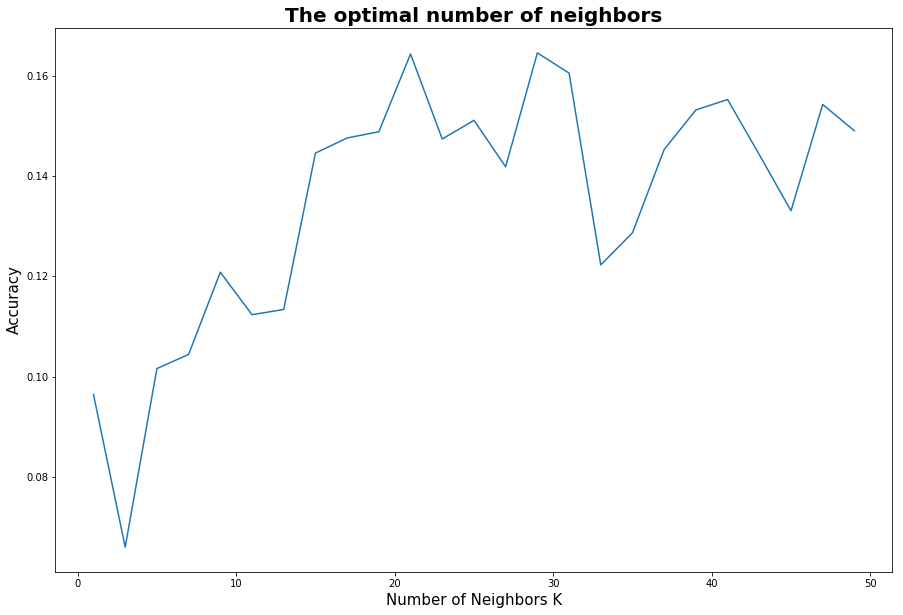

In [95]:
# creating list of cv scores
cv_scores = []
k_list = [i for i in range(1, 50, 2)]

# perform 10-fold cross validation
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())



# Displaying results visually
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.plot(k_list, cv_scores)

plt.show()

In [96]:
# Set up Flask App
app = Flask(__name__)

@app.route("/", methods = ['GET'])
def classify():
    classes = ["5'1","5'2","5'3","5'4","5'5","5'6","5'7","5'8","5'9","5'10","5'11","6'0","6'1","6'2","6'3","6'4","6'5","6'6","6'7"]
    components = ["GKDiving", "GKHandling", "GKKicking","GKPositioning","GKReflexes"]
    for component in components:
        print(request.args.get(component))
    
    # get values for each component, return error message if not a float
    try:
        values = [[float(request.args.get(component)) for component in ["GKDiving", "GKHandling", "GKKicking","GKPositioning","GKReflexes"]]]
    except TypeError:
        return "An error occured\nUsage: 127.0.0.1:5000?GKDiving=NUM&GKHandling=NUM&GKKicking=NUM&GKPositioning=NUM&GKReflexes=NUM"
    
    # Otherwise, return the prediction.
    prediction = knn_classifier.predict(values)[0]
    return classes[prediction]

# Run the app.
app.run()

# try 127.0.0.1:5000?sHeight=5.2&sWidth=4.6&pHeight=4.2&pWidth=7.8

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [20/Oct/2019 22:31:10] "GET / HTTP/1.1" 200 -


None
None
None
None
None


127.0.0.1 - - [20/Oct/2019 22:31:29] "GET /?GKDiving=12&GKHandling=13&GKKicking=14&GKPositioning=12&GKReflexes=10 HTTP/1.1" 200 -


12
13
14
12
10


127.0.0.1 - - [20/Oct/2019 22:31:44] "GET /?GKDiving=96&GKHandling=90&GKKicking=88&GKPositioning=80&GKReflexes=90 HTTP/1.1" 200 -


96
90
88
80
90


127.0.0.1 - - [20/Oct/2019 22:31:46] "GET /?GKDiving=96&GKHandling=90&GKKicking=88&GKPositioning=80&GKReflexes=90 HTTP/1.1" 200 -


96
90
88
80
90


127.0.0.1 - - [20/Oct/2019 22:31:47] "GET /?GKDiving=96&GKHandling=90&GKKicking=88&GKPositioning=80&GKReflexes=90 HTTP/1.1" 200 -


96
90
88
80
90


127.0.0.1 - - [20/Oct/2019 22:31:51] "GET /?GKDiving=96&GKHandling=2&GKKicking=88&GKPositioning=80&GKReflexes=90 HTTP/1.1" 200 -


96
2
88
80
90


127.0.0.1 - - [20/Oct/2019 22:31:52] "GET /?GKDiving=96&GKHandling=2&GKKicking=88&GKPositioning=80&GKReflexes=90 HTTP/1.1" 200 -


96
2
88
80
90


127.0.0.1 - - [20/Oct/2019 22:31:55] "GET /?GKDiving=96&GKHandling=2&GKKicking=3&GKPositioning=80&GKReflexes=90 HTTP/1.1" 200 -


96
2
3
80
90


127.0.0.1 - - [20/Oct/2019 22:31:57] "GET /?GKDiving=96&GKHandling=2&GKKicking=3&GKPositioning=4&GKReflexes=90 HTTP/1.1" 200 -


96
2
3
4
90


127.0.0.1 - - [20/Oct/2019 22:32:08] "GET /?GKDiving=96&GKHandling=2&GKKicking=3&GKPositioning=1&GKReflexes=90 HTTP/1.1" 200 -


96
2
3
1
90


127.0.0.1 - - [20/Oct/2019 22:32:12] "GET /?GKDiving=96&GKHandling=2&GKKicking=3&GKPositioning=90&GKReflexes=90 HTTP/1.1" 200 -


96
2
3
90
90


127.0.0.1 - - [20/Oct/2019 22:32:15] "GET /?GKDiving=96&GKHandling=2&GKKicking=3&GKPositioning=12&GKReflexes=90 HTTP/1.1" 200 -


96
2
3
12
90


127.0.0.1 - - [20/Oct/2019 22:32:18] "GET /?GKDiving=96&GKHandling=2&GKKicking=3&GKPositioning=45&GKReflexes=90 HTTP/1.1" 200 -


96
2
3
45
90


127.0.0.1 - - [20/Oct/2019 22:32:20] "GET /?GKDiving=96&GKHandling=2&GKKicking=3&GKPositioning=3&GKReflexes=90 HTTP/1.1" 200 -


96
2
3
3
90


127.0.0.1 - - [20/Oct/2019 22:32:25] "GET /?GKDiving=96&GKHandling=2&GKKicking=3&GKPositioning=60&GKReflexes=90 HTTP/1.1" 200 -


96
2
3
60
90


127.0.0.1 - - [20/Oct/2019 22:32:28] "GET /?GKDiving=96&GKHandling=2&GKKicking=3&GKPositioning=60&GKReflexes=45 HTTP/1.1" 200 -


96
2
3
60
45


127.0.0.1 - - [20/Oct/2019 22:32:34] "GET /?GKDiving=96&GKHandling=2&GKKicking=35&GKPositioning=60&GKReflexes=45 HTTP/1.1" 200 -


96
2
35
60
45


127.0.0.1 - - [20/Oct/2019 22:32:39] "GET /?GKDiving=96&GKHandling=90&GKKicking=35&GKPositioning=60&GKReflexes=45 HTTP/1.1" 200 -


96
90
35
60
45


127.0.0.1 - - [20/Oct/2019 22:32:42] "GET /?GKDiving=96&GKHandling=43&GKKicking=35&GKPositioning=60&GKReflexes=45 HTTP/1.1" 200 -


96
43
35
60
45


127.0.0.1 - - [20/Oct/2019 22:32:45] "GET /?GKDiving=96&GKHandling=24&GKKicking=35&GKPositioning=60&GKReflexes=45 HTTP/1.1" 200 -


96
24
35
60
45


127.0.0.1 - - [20/Oct/2019 22:32:47] "GET /?GKDiving=96&GKHandling=60&GKKicking=35&GKPositioning=60&GKReflexes=45 HTTP/1.1" 200 -


96
60
35
60
45


127.0.0.1 - - [20/Oct/2019 22:32:50] "GET /?GKDiving=96&GKHandling=36&GKKicking=35&GKPositioning=60&GKReflexes=45 HTTP/1.1" 200 -


96
36
35
60
45
